In [2]:
Data_Path = r'/home/youssef/Documents/Data Science/stack over flow/data/raw/survey_results_public.csv'
Export_Path = r'/home/youssef/Documents/Data Science/stack over flow/data/processed/1_preprocessed_df.pkl'

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Cleaning

In [5]:
raw_df = pd.read_csv(Data_Path)
df = raw_df.copy()

In [6]:
df.columns.tolist()

['ResponseId',
 'MainBranch',
 'Age',
 'Employment',
 'RemoteWork',
 'Check',
 'CodingActivities',
 'EdLevel',
 'LearnCode',
 'LearnCodeOnline',
 'TechDoc',
 'YearsCode',
 'YearsCodePro',
 'DevType',
 'OrgSize',
 'PurchaseInfluence',
 'BuyNewTool',
 'BuildvsBuy',
 'TechEndorse',
 'Country',
 'Currency',
 'CompTotal',
 'LanguageHaveWorkedWith',
 'LanguageWantToWorkWith',
 'LanguageAdmired',
 'DatabaseHaveWorkedWith',
 'DatabaseWantToWorkWith',
 'DatabaseAdmired',
 'PlatformHaveWorkedWith',
 'PlatformWantToWorkWith',
 'PlatformAdmired',
 'WebframeHaveWorkedWith',
 'WebframeWantToWorkWith',
 'WebframeAdmired',
 'EmbeddedHaveWorkedWith',
 'EmbeddedWantToWorkWith',
 'EmbeddedAdmired',
 'MiscTechHaveWorkedWith',
 'MiscTechWantToWorkWith',
 'MiscTechAdmired',
 'ToolsTechHaveWorkedWith',
 'ToolsTechWantToWorkWith',
 'ToolsTechAdmired',
 'NEWCollabToolsHaveWorkedWith',
 'NEWCollabToolsWantToWorkWith',
 'NEWCollabToolsAdmired',
 'OpSysPersonal use',
 'OpSysProfessional use',
 'OfficeStackAsyncHa

# Drop unnecessary columns

In [7]:
remained_cols = ['YearsCodePro',
 'DevType','Country','LanguageHaveWorkedWith','DatabaseHaveWorkedWith','PlatformHaveWorkedWith',
 'WebframeHaveWorkedWith','EmbeddedHaveWorkedWith','MiscTechHaveWorkedWith','ToolsTechHaveWorkedWith',
 'NEWCollabToolsHaveWorkedWith','OpSysPersonal use','OpSysProfessional use','OfficeStackAsyncHaveWorkedWith',
 'OfficeStackSyncHaveWorkedWith','AISearchDevHaveWorkedWith','WorkExp']
df = df[remained_cols]

In [8]:
df.head()

,YearsCodePro,DevType,Country,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,WebframeHaveWorkedWith,EmbeddedHaveWorkedWith,MiscTechHaveWorkedWith,ToolsTechHaveWorkedWith,NEWCollabToolsHaveWorkedWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackSyncHaveWorkedWith,AISearchDevHaveWorkedWith,WorkExp
0,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17,"Developer, full-stack",United Kingdom of Great Britain and Northern I...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,Microsoft Teams;Slack,NaN,17.0
2,27,Developer Experience,United Kingdom of Great Britain and Northern I...,C#,Firebase Realtime Database,Google Cloud,ASP.NET CORE,Rasberry Pi,.NET (5+) ;.NET Framework (1.0 - 4.8);.NET MAUI,MSBuild,Visual Studio,Windows,Windows,NaN,Google Chat;Google Meet;Microsoft Teams;Zoom,NaN,NaN
3,NaN,"Developer, full-stack",Canada,C;C++;HTML/CSS;Java;JavaScript;PHP;PowerShell;...,MongoDB;MySQL;PostgreSQL;SQLite,Amazon Web Services (AWS);Fly.io;Heroku,jQuery;Next.js;Node.js;React;WordPress,Rasberry Pi,NumPy;Pandas;Ruff;TensorFlow,Docker;npm;Pip,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,"Developer, full-stack",Norway,C++;HTML/CSS;JavaScript;Lua;Python;Rust,PostgreSQL;SQLite,NaN,NaN,CMake;Cargo;Rasberry Pi,NaN,APT;Make;npm,Vim,Other (please specify):,NaN,GitHub Discussions;Markdown File;Obsidian;Stac...,Discord;Whatsapp,NaN,NaN


In [9]:
df.shape

(65437, 17)

# Duplicates

In [10]:
df.duplicated().sum()

4257

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.shape

(61180, 17)

# Null values

<Axes: >

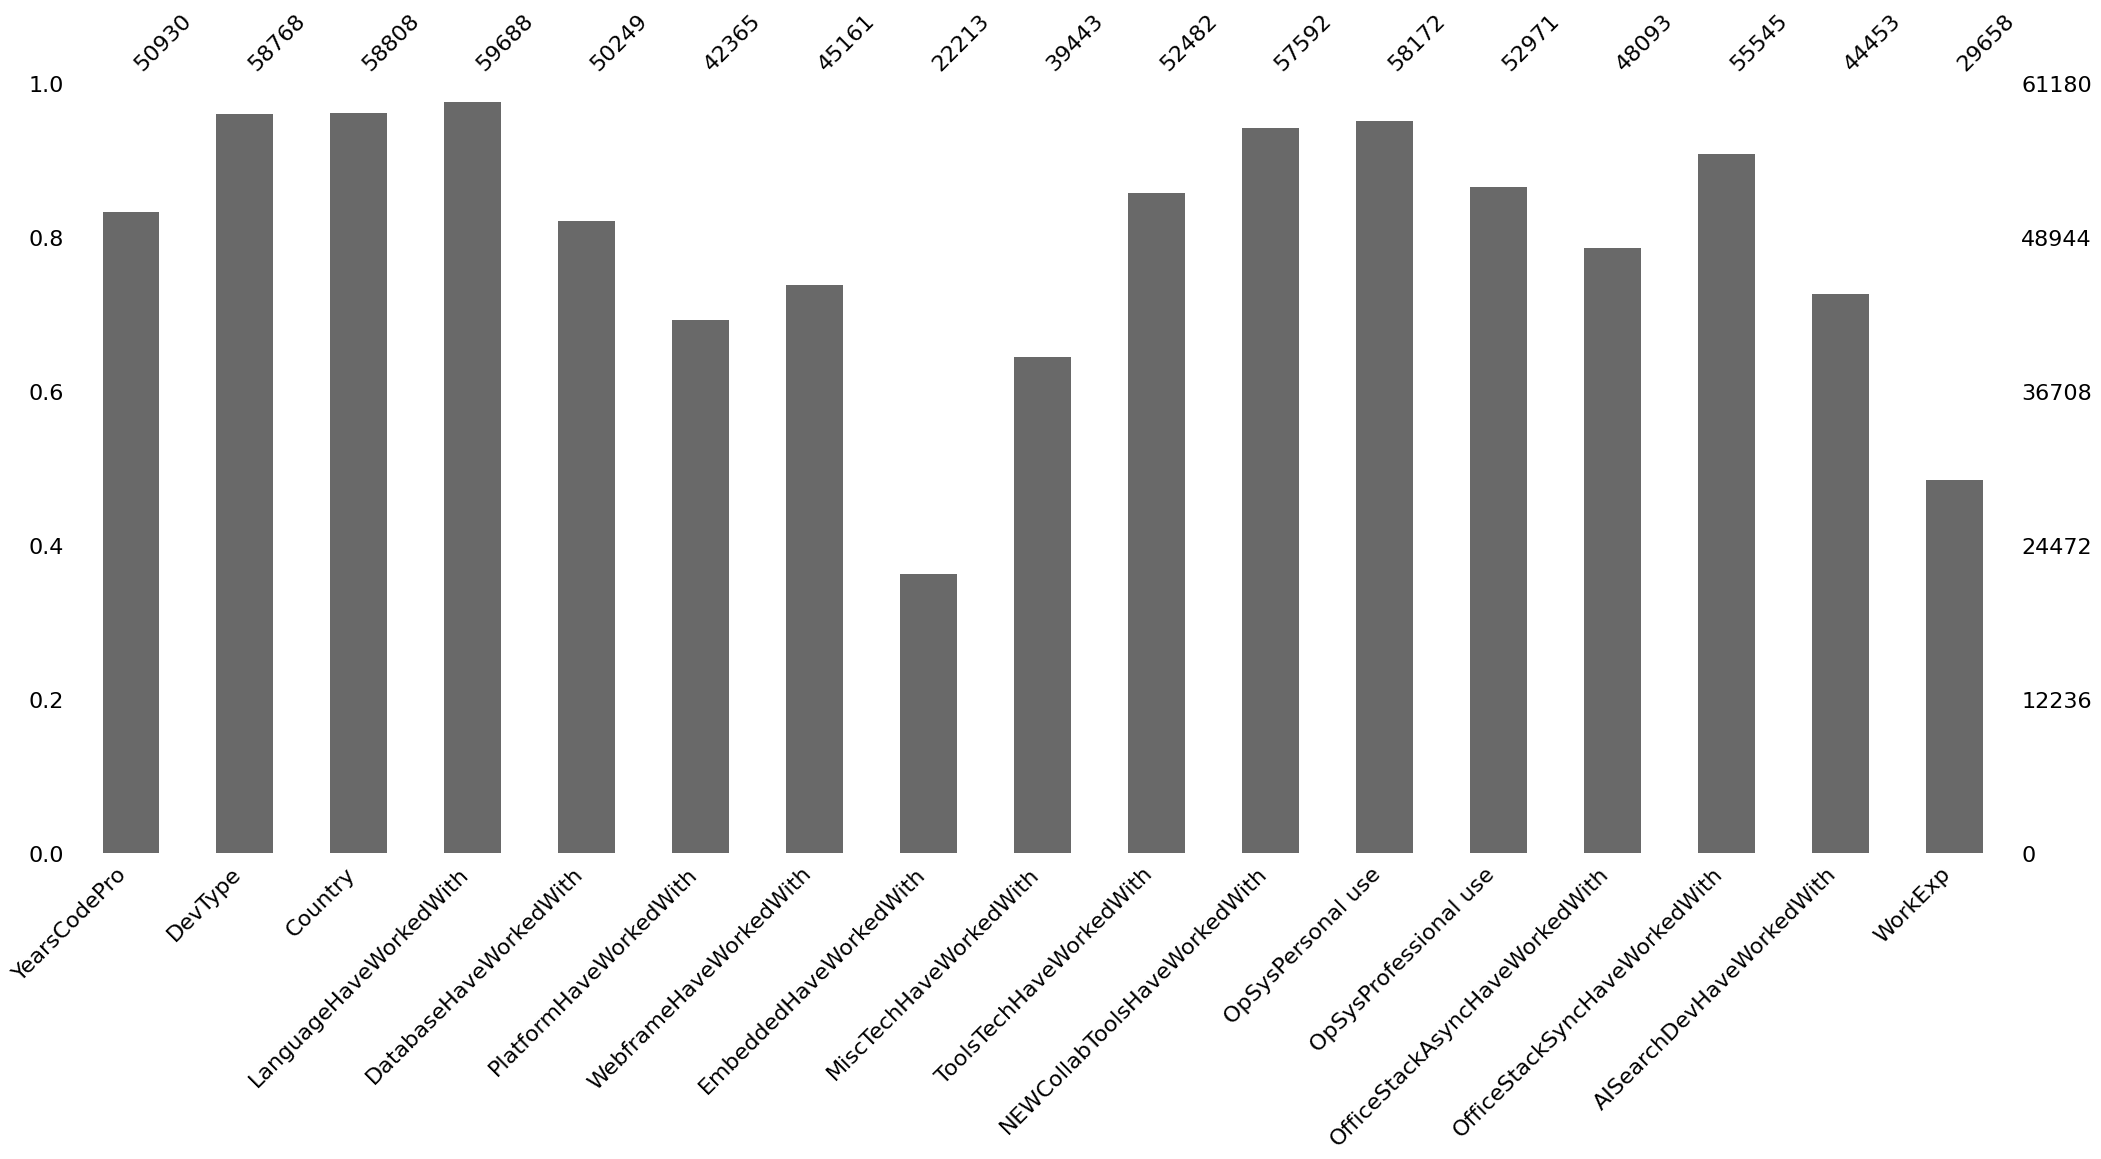

In [13]:
msno.bar(df)

In [14]:
df.isnull().sum()

YearsCodePro                      10250
DevType                            2412
Country                            2372
LanguageHaveWorkedWith             1492
DatabaseHaveWorkedWith            10931
PlatformHaveWorkedWith            18815
WebframeHaveWorkedWith            16019
EmbeddedHaveWorkedWith            38967
MiscTechHaveWorkedWith            21737
ToolsTechHaveWorkedWith            8698
NEWCollabToolsHaveWorkedWith       3588
OpSysPersonal use                  3008
OpSysProfessional use              8209
OfficeStackAsyncHaveWorkedWith    13087
OfficeStackSyncHaveWorkedWith      5635
AISearchDevHaveWorkedWith         16727
WorkExp                           31522
dtype: int64

<Axes: >

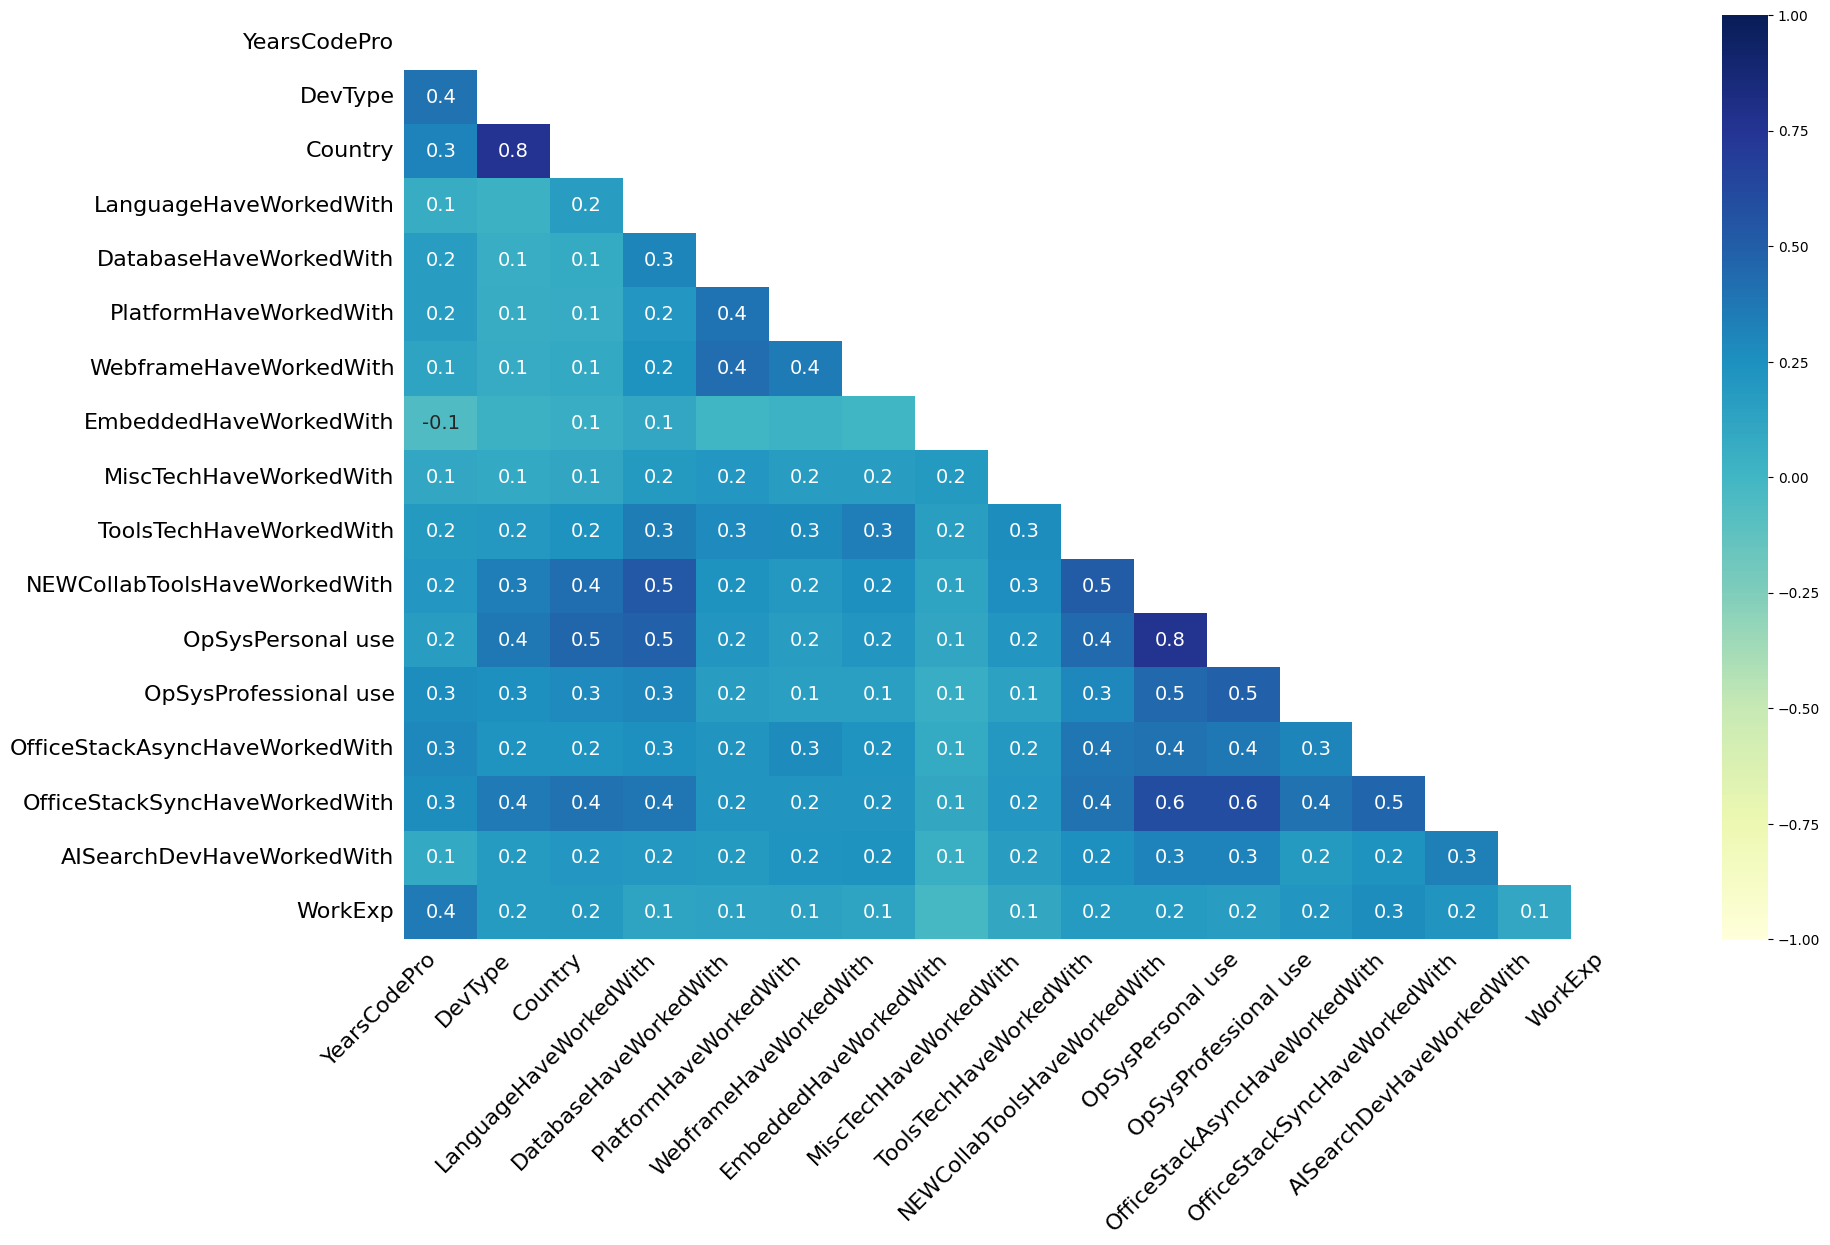

In [15]:
msno.heatmap(df, cmap='YlGnBu')

In [16]:
# check number of rows with all columns contain null values
df[df.isnull().sum(axis=1) == 17].shape[0]

1

In [17]:
df.drop(index = df[df.isnull().sum(axis=1) > 16].shape[0], inplace=True)

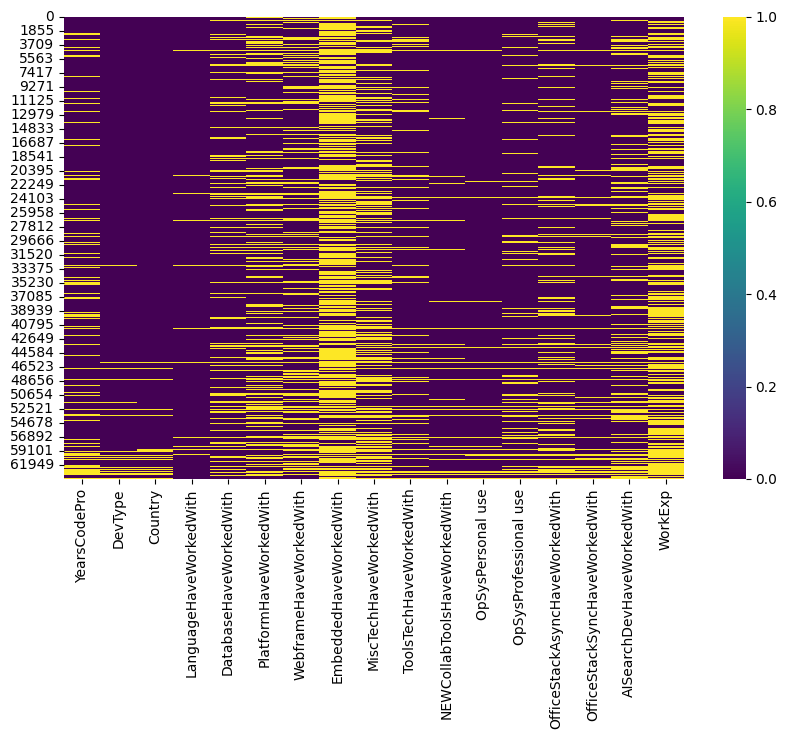

In [18]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cmap='viridis')
plt.show()

In [19]:
cols_to_clean = ['LanguageHaveWorkedWith','DatabaseHaveWorkedWith','PlatformHaveWorkedWith',
 'WebframeHaveWorkedWith','EmbeddedHaveWorkedWith','MiscTechHaveWorkedWith','ToolsTechHaveWorkedWith',
 'NEWCollabToolsHaveWorkedWith','OpSysPersonal use','OpSysProfessional use','OfficeStackAsyncHaveWorkedWith',
 'OfficeStackSyncHaveWorkedWith','AISearchDevHaveWorkedWith']
df[cols_to_clean] = df[cols_to_clean].fillna(0)

In [20]:
df.isnull().sum()

YearsCodePro                      10250
DevType                            2412
Country                            2372
LanguageHaveWorkedWith                0
DatabaseHaveWorkedWith                0
PlatformHaveWorkedWith                0
WebframeHaveWorkedWith                0
EmbeddedHaveWorkedWith                0
MiscTechHaveWorkedWith                0
ToolsTechHaveWorkedWith               0
NEWCollabToolsHaveWorkedWith          0
OpSysPersonal use                     0
OpSysProfessional use                 0
OfficeStackAsyncHaveWorkedWith        0
OfficeStackSyncHaveWorkedWith         0
AISearchDevHaveWorkedWith             0
WorkExp                           31522
dtype: int64

In [21]:
df.dropna(subset= ['Country', 'DevType'], inplace=True)

In [22]:
df.isnull().sum()

YearsCodePro                       8040
DevType                               0
Country                               0
LanguageHaveWorkedWith                0
DatabaseHaveWorkedWith                0
PlatformHaveWorkedWith                0
WebframeHaveWorkedWith                0
EmbeddedHaveWorkedWith                0
MiscTechHaveWorkedWith                0
ToolsTechHaveWorkedWith               0
NEWCollabToolsHaveWorkedWith          0
OpSysPersonal use                     0
OpSysProfessional use                 0
OfficeStackAsyncHaveWorkedWith        0
OfficeStackSyncHaveWorkedWith         0
AISearchDevHaveWorkedWith             0
WorkExp                           28615
dtype: int64

In [23]:
df['DevType'].unique()

array(['Developer Experience', 'Developer, full-stack', 'Student',
       'Academic researcher', 'Project manager', 'Developer Advocate',
       'Developer, back-end', 'Other (please specify):',
       'Developer, front-end', 'Database administrator',
       'Developer, desktop or enterprise applications',
       'Cloud infrastructure engineer',
       'Data scientist or machine learning specialist',
       'Research & Development role',
       'Developer, embedded applications or devices',
       'System administrator', 'DevOps specialist', 'Engineering manager',
       'Designer', 'Security professional',
       'Senior Executive (C-Suite, VP, etc.)', 'Developer, mobile',
       'Developer, game or graphics', 'Data or business analyst',
       'Educator', 'Developer, QA or test', 'Product manager',
       'Developer, AI', 'Scientist', 'Engineer, site reliability',
       'Blockchain', 'Marketing or sales professional',
       'Hardware Engineer', 'Data engineer'], dtype=object)

In [24]:
df['WorkExp'].unique()

array([nan, 15., 12., 29., 10., 18., 16., 17.,  6.,  7., 14.,  3.,  4.,
        8.,  1.,  9., 27., 31., 35., 25.,  5., 28., 26., 13., 30., 37.,
        2., 24., 20., 23., 19., 21., 11., 34., 32., 22.,  0., 33., 44.,
       40., 41., 36., 45., 39., 50., 38., 48., 42., 46., 43., 49., 47.])

In [25]:
df[['YearsCodePro', 'WorkExp']] = df[['YearsCodePro', 'WorkExp']].fillna(0)

In [26]:
df.isna().sum().sum()

0

In [27]:
df.to_pickle(Export_Path)